In [29]:
import os
import glob
import pickle5 as pickle
import dlib
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [35]:
face_detector = dlib.get_frontal_face_detector()
points_detector = dlib.shape_predictor("data/recursos/shape_predictor_68_face_landmarks.dat")
face_recognition = dlib.face_recognition_model_v1("data/recursos/dlib_face_recognition_resnet_model_v1.dat")

indexes = np.load("data/recursos/rn_indexes.picke", allow_pickle=True)
facial_descriptors = np.load("data/recursos/rn_descriptors.npy")

In [50]:
def mode(predictions) -> str:
    idx = {}

    mx_value, ans = 0, None

    for prediction in predictions:
        idx.get
        if prediction not in idx:
            idx[prediction] = 1
        else:
            idx[prediction] += 1

    for key in idx:
        if idx[key] > mx_value:
            mx_value = idx[key]
            ans = key

    return ans
    

def knn(test, threshold = 0.5, k = 1):
    dists = []

    for i, sample in enumerate(facial_descriptors):
        dist = np.linalg.norm(test - sample)
        
        dists.append((dist, indexes[i]))


    dists.sort()
    dists = dists[0:k]

    predictions = [dist[1] for dist in dists if dist[0] <= threshold]

    return mode(predictions)

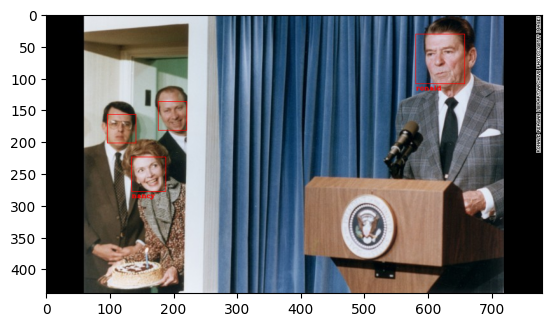

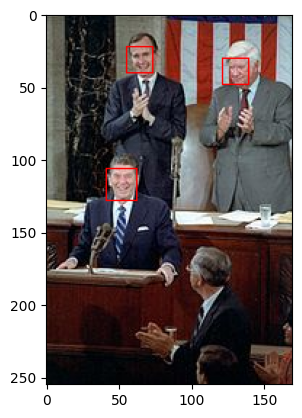

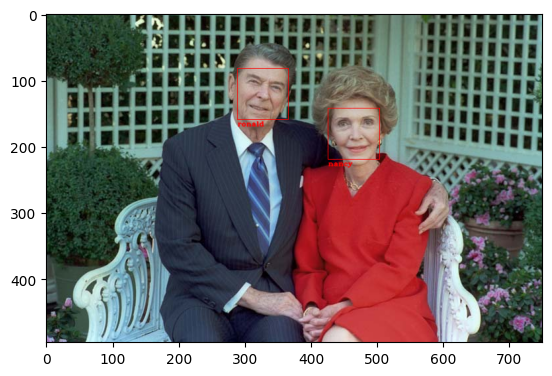

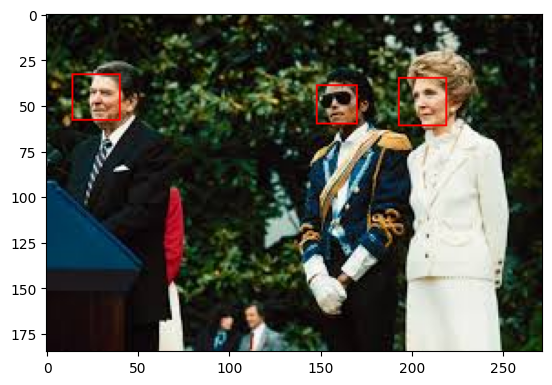

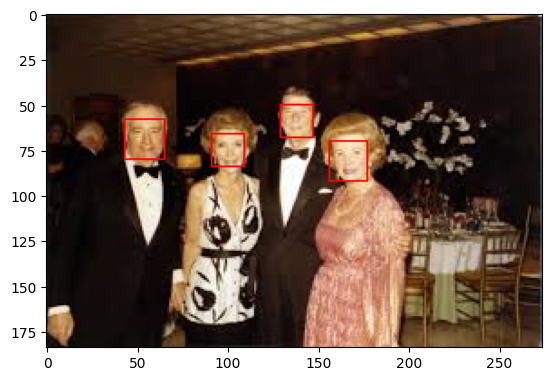

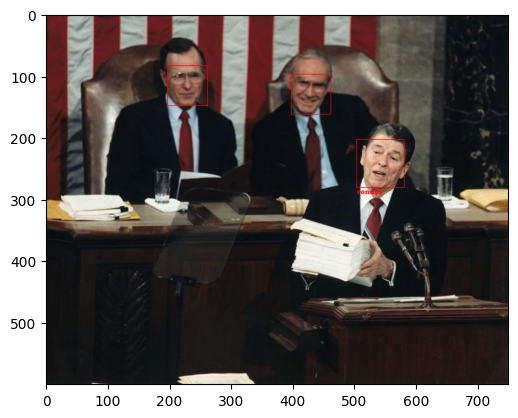

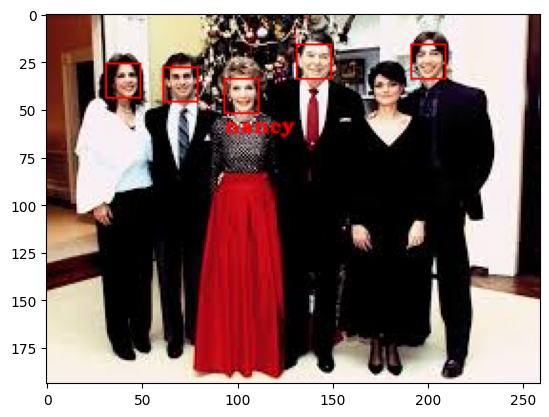

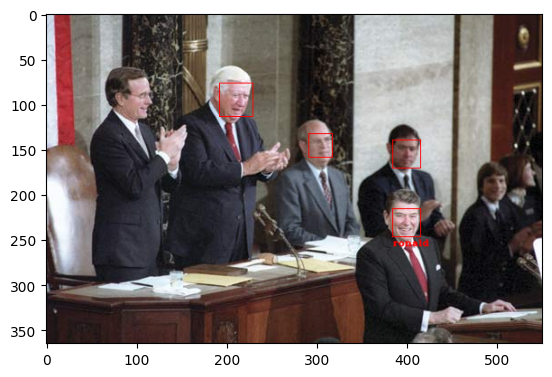

In [51]:
for  img_file in glob.glob(os.path.join("data/fotos", "*.jpg")):
    img = cv.imread(img_file)
    faces = face_detector(img, 2)

    for face in faces:
        face_points = points_detector(img, face)
        face_descriptor = face_recognition.compute_face_descriptor(img, face_points)
        img_face_descriptors = np.asarray([df for df in face_descriptor], dtype=np.float64)

        prediction = knn(img_face_descriptors)

        x_min, y_max = face.tl_corner().x, face.tl_corner().y
        x_max, y_min = face.br_corner().x, face.br_corner().y

        cv.rectangle(img, (x_min, y_max), (x_max, y_min), (0,0,255), 1)
        cv.putText(img, prediction, (x_min, y_min + 10), cv.FONT_HERSHEY_COMPLEX_SMALL, 0.5, (0,0,255), 1, cv.LINE_AA)

    plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    plt.show()
    
